In [272]:
import numpy as np
from ppopt.mpmodel import MPModeler
from ppopt.mp_solvers.solve_mpqp import solve_mpqp, mpqp_algorithm
from ppopt.plot import parametric_plot
from numpy.polynomial.legendre import leggauss
import copy

In [273]:
# m = MPModeler()
# 
# u = m.add_var(name='u')
# x = m.add_var(name='x')
# z = m.add_var(name='z')
# 
# t1 = m.add_param(name='t1')
# t2 = m.add_param(name='t2')
# d1 = m.add_param(name='d1')
# d2 = m.add_param(name='d2')

In [274]:
# m.add_constr(2*x - 3*z + t1 - d2 == 0)
# m.add_constr(x - z/2 -t1/2 +t2/2 +d1 -7*d2/2 <= u)
# m.add_constr(-2*x +2*z -4*t1/3 -t2 +2*d2 +1/3<= u)
# m.add_constr(-x + 5*z/2 +t1/2 -t2 -d1 +d2/2 -1 <= u)
# m.add_constr(-50 <= x)
# m.add_constr(0-50 <= z)
# m.add_constr(0 <= t1)
# m.add_constr(0 <= t2)
# m.add_constr(0 <= d1)
# m.add_constr(0 <= d2)
# m.add_constr(t1 <= 4)
# m.add_constr(t2 <= 4)
# m.add_constr(d1 <= 5)
# m.add_constr(d2 <= 5)

In [275]:
# m.set_objective(u)

In [276]:
# prob = m.formulate_problem()
# prob.process_constraints()

In [277]:
# solution = solve_mpqp(problem=prob, algorithm=mpqp_algorithm.combinatorial)

In [278]:
# psi_matrix = np.empty((len(solution), solution.critical_regions[0].A.shape[1] + solution.critical_regions[0].b.shape[1]))
# psi_idx = 0

In [279]:
# psi_matrix

In [280]:
# np.concatenate([solution.critical_regions[0].A[0,:], solution.critical_regions[0].b[0,:]], axis=0)

In [281]:
# for i in range(len(solution.critical_regions)):
#     psi_matrix[i] = np.concatenate([solution.critical_regions[i].A[psi_idx,:], solution.critical_regions[i].b[psi_idx,:]], axis=0)

In [282]:
# psi_matrix

In [283]:
m_t1 = MPModeler()

t1_max = m_t1.add_var('t1_max')
t1_min = m_t1.add_var('t1_min')
t2_a = m_t1.add_var('t2_a')
t2_b = m_t1.add_var('t2_b')

d1 = m_t1.add_param('d1')
d2 = m_t1.add_param('d2')

In [284]:
m_t1.add_constr(-2/3*t1_min - 1/4*t2_a +1/2*d1 - d2 +1/6 <= 0)
m_t1.add_constr(1/3*t1_min -t2_a -1/2*d1 +1/2*d2 -1/3 <= 0)

m_t1.add_constr(-2/3*t1_max - 1/4*t2_b +1/2*d1 - d2 +1/6 <= 0)
m_t1.add_constr(1/3*t1_max -t2_b -1/2*d1 +1/2*d2 -1/3 <= 0)

m_t1.add_constr(0 <= t1_max)
m_t1.add_constr(t1_max <= 4)
m_t1.add_constr(0 <= t1_min)
m_t1.add_constr(t1_min <= 4)
m_t1.add_constr(t1_min <= t1_max)

m_t1.add_constr(0 <= t2_a)
m_t1.add_constr(t2_a <= 4)
m_t1.add_constr(0 <= t2_b)
m_t1.add_constr(t2_b <= 4)

m_t1.add_constr(0 <= d1)
m_t1.add_constr(0 <= d2)
m_t1.add_constr(d1 <= 5)
m_t1.add_constr(d2 <= 5)

In [285]:
m_t1.set_objective(t1_min-t1_max)

In [286]:
prob_t1 = m_t1.formulate_problem()
prob_t1.process_constraints()

In [287]:
solution_t1 = solve_mpqp(problem=prob_t1, algorithm=mpqp_algorithm.geometric)

Using a found active set [5, 6, 10, 12]


In [288]:
print(f'Number of critical regions: {len(solution_t1)}')

Number of critical regions: 2


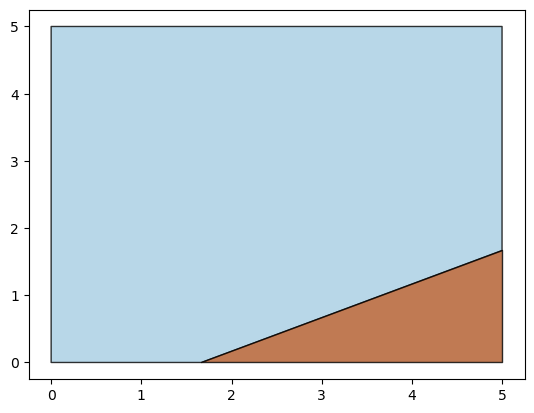

In [289]:
parametric_plot(solution_t1, show=True)

In [290]:
m_t2 = MPModeler()

t2_max = m_t2.add_var('t2_max')
t2_min = m_t2.add_var('t2_min')

t1 = m_t2.add_param('t1')
d1 = m_t2.add_param('d1')
d2 = m_t2.add_param('d2')

In [291]:
m_t2.add_constr(-2/3*t1 - 1/4*t2_max +1/2*d1 - d2 +1/6 <= 0)
m_t2.add_constr(1/3*t1 -t2_max -1/2*d1 +1/2*d2 -1/3 <= 0)

m_t2.add_constr(-2/3*t1 - 1/4*t2_min +1/2*d1 - d2 +1/6 <= 0)
m_t2.add_constr(1/3*t1 -t2_min -1/2*d1 +1/2*d2 -1/3 <= 0)

m_t2.add_constr(0 <= t2_max)
m_t2.add_constr(t2_max <= 4)
m_t2.add_constr(0 <= t2_min)
m_t2.add_constr(t2_min <= 4)
m_t2.add_constr(t2_min <= t2_max)

m_t2.add_constr(0 <= t1)
m_t2.add_constr(t1 <= 4)
m_t2.add_constr(0 <= d1)
m_t2.add_constr(0 <= d2)
m_t2.add_constr(d1 <= 5)
m_t2.add_constr(d2 <= 5)

In [292]:
m_t2.set_objective(-(t2_max-t2_min))

In [293]:
prob_t2 = m_t2.formulate_problem()
prob_t2.process_constraints()

In [294]:
solution_t2 = solve_mpqp(problem=prob_t2, algorithm=mpqp_algorithm.geometric)

Using a found active set [3, 5]


In [295]:
print(f'Number of critical regions: {len(solution_t2)}')

Number of critical regions: 3


In [296]:
# parametric_plot(solution_t2, show=True)

In [297]:
# n=7
# points, weights = np.polynomial.legendre.leggauss(n)
# a, b = 1/3, 7  # Example new interval
# 
# # Change of variable to map from [-1,1] to [a,b]
# points_mapped = 0.5 * (points + 1) * (b - a) + a
# weights_mapped = 0.5 * (b-a) * weights


In [298]:
crt1_list = list(solution_t1.critical_regions)

In [299]:
crt1_list[0].get_constraints()

[array([[ 0.4472136 , -0.89442719],
        [-1.        ,  0.        ],
        [ 0.        , -1.        ],
        [ 1.        ,  0.        ],
        [ 0.        ,  1.        ]]),
 array([[ 0.74535599],
        [-0.        ],
        [-0.        ],
        [ 5.        ],
        [ 5.        ]])]

In [300]:
crt2_list = list(solution_t2.critical_regions)

In [301]:
crt2_list[0].get_constraints()

[array([[-0.42640143,  0.63960215, -0.63960215],
        [-1.        ,  0.        ,  0.        ],
        [ 1.        ,  0.        ,  0.        ],
        [ 0.        , -1.        ,  0.        ],
        [ 0.        ,  0.        , -1.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]),
 array([[-0.42640143],
        [-0.        ],
        [ 4.        ],
        [-0.        ],
        [-0.        ],
        [ 5.        ],
        [ 5.        ]])]

In [302]:
np.concatenate([crt1_list[0].A, crt1_list[0].b], axis=1)[:2, :]

array([[0., 0., 4.],
       [0., 0., 0.]])

In [303]:
np.concatenate([crt1_list[1].A, crt1_list[1].b], axis=1)[:2, :]

array([[ 0.  ,  0.  ,  4.  ],
       [ 0.75, -1.5 , -1.25]])

In [304]:
def gauss_legendre_between_bounds(expr_coeffs: np.ndarray, n_gl: int, max_idx: int = 0, min_idx: int = 1):
    """
    Generate n Gauss–Legendre quadrature points and weights between min and max bounds
    defined by two linear expressions.

    Parameters:
        expr_coeffs (np.ndarray): 2xD array. Row 0 = max point coefficients, Row 1 = min.
        n (int): Number of quadrature points.

    Returns:
        points (np.ndarray): (n, D) array of quadrature points.
        weights (np.ndarray): (n,) array of weights.
    """
    if expr_coeffs.shape[0] != 2:
        raise ValueError("expr_coeffs must have two rows: [max_coeffs; min_coeffs]")

    max_coeffs = expr_coeffs[max_idx]
    min_coeffs = expr_coeffs[min_idx]

    # Get Gauss–Legendre points and weights on [-1, 1]
    nodes, weights = leggauss(n_gl)

    # Affine transformation to domain [min_coeffs, max_coeffs]
    points = 0.5 * (np.outer((nodes + 1), max_coeffs) + np.outer((1 - nodes), min_coeffs))

    # Adjust weights to match new domain
    interval_length = np.linalg.norm(max_coeffs - min_coeffs)
    weights = weights * 0.5 * interval_length

    return points, weights


In [306]:
# Example: 2D line segment from [0,0] (min) to [1,1] (max)
coeffs = np.array([
    [0, 0, 4],  # max point
    [0, 0, 0],  # min point
])
points, weights = gauss_legendre_between_bounds(expr_coeffs=coeffs, n_gl=5)

print("Points:\n", points)
print("Weights:\n", weights)

Points:
 [[0.         0.         0.18764031]
 [0.         0.         0.92306138]
 [0.         0.         2.        ]
 [0.         0.         3.07693862]
 [0.         0.         3.81235969]]
Weights:
 [0.47385377 0.95725734 1.13777778 0.95725734 0.47385377]
